<a href="https://colab.research.google.com/github/Shashwot90/CV/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction to Regression with Neural Networks in TensorFlow

predicting a numberical variable based on some other combination of variables

In [ ]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.13.0
Notebook last run (end-to-end): 2023-10-18 09:00:15.670498


###Creating Data to view and fit

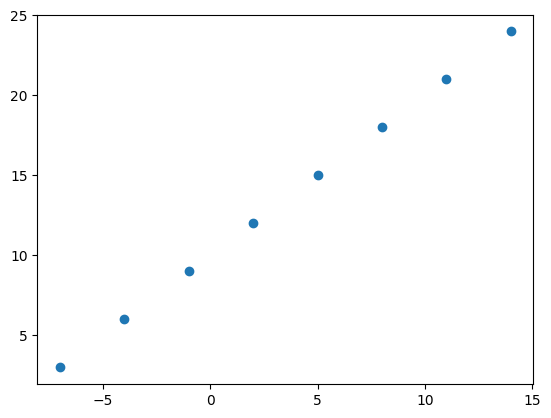

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);



In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

###Input and Output shapes

In [ ]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

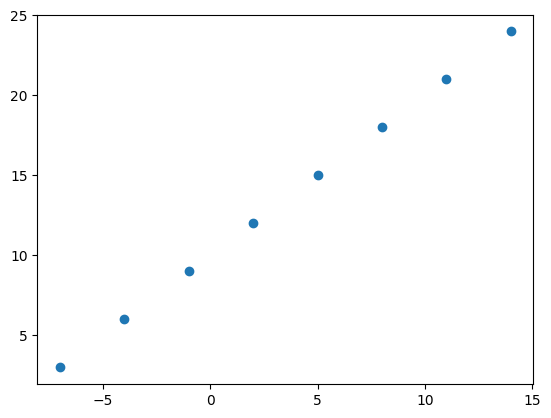

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

from keras.api._v2.keras import layers
###Steps in modelling with tensorflow

1. creating a model - define the input and output layers, as wll as hidden layers

2. Compiling a model - define the loss function (function that will tell out model how wrong it is) and optimizer ( tells the model how to improve the patterns its learning) and evaluation metrics ( what we use to interpret the performance of our model)

3. Fitting a model - letting the model try to find patterms between X and y ( features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 666ms/step - loss: 13.8487 - mae: 13.8487
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 13.7162 - mae: 13.7162
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 13.5837 - mae: 13.5837
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 13.4512 - mae: 13.4512
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 13.3187 - mae: 13.3187


In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[1.3315513]], dtype=float32)

from typing_extensions import reveal_type
###Improving our model

by altering the steps we took to create model

1. Creating a model - add more layers, increase the number of hidden layers, change activation function

2. Compiling a model - change optimizer function, learning reveal_type

3. Fitting a model - fit a model for more epochs or on more data

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 317ms/step - loss: 13.1840 - mae: 13.1840
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 13.0515 - mae: 13.0515
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9190 - mae: 12.9190
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7865 - mae: 12.7865
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6540 - mae: 12.6540
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 12.5215 - mae: 12.5215
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3890 - mae: 12.3890
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2565 - mae: 12.2565
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1240 - mae: 12.1240
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9915 - mae: 11.9915
Epoch 11/100
1/1 [==============================

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[29.769905]], dtype=float32)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 640ms/step - loss: 14.3320 - mae: 14.3320
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 14.2599 - mae: 14.2599
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.1878 - mae: 14.1878
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 14.1159 - mae: 14.1159
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 14.0440 - mae: 14.0440
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 13.9721 - mae: 13.9721
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 13.9004 - mae: 13.9004
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 13.8286 - mae: 13.8286
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 13.7569 - mae: 13.7569
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 13.6853 - mae: 13.6853
Epoch 11/100
1/1 [==============================

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 154ms/step


array([[28.969551]], dtype=float32)

from tensorflow.python.ops.gen_data_flow_ops import tensor_array_write_eager_fallback
###Evaluating a model

build -> fit => evaluate -> tweak -> fit -> evaluate -> tensor_array_write_eager_fallback

Visualize visualize visualize
what data? model look like? training of model? predictions of model?


In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

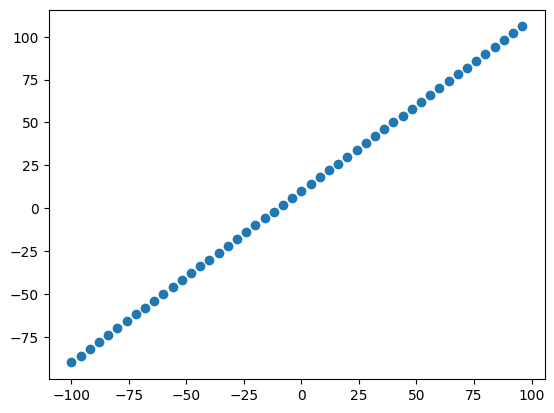

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

###The 3 sets

* Training set - model learns from this data, which is 70-80% of data

* Validation set - 10-15% of data available

* Test set- model gets evaluated on this data to test what has been learned, 10-15%

In [ ]:
#check length
len(X)

50

In [ ]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

###Visualizing the data

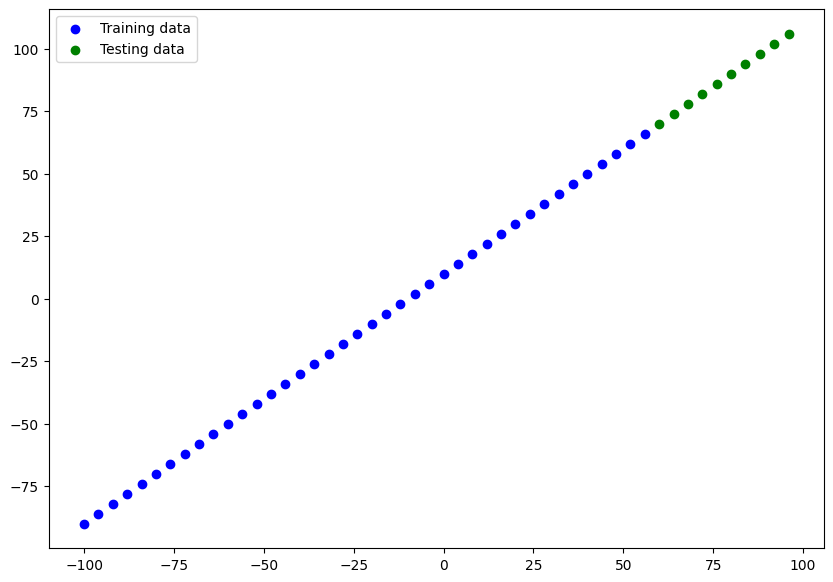

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#model.fit(X_train, y_train, epochs=100)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in a model
* Trainable params - these are the parameters the model can update as it trains
* Non-trainable params - aren't updated during training (typical when you bring already learn patterns or parameters from other models during transfer learning)

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 27.0155 - mae: 27.0155
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6841 - mae: 8.6841
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 11.0021 - mae: 11.0021
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4233 - mae: 9.4233
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3121 - mae: 10.3121
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 9.5564 - mae: 9.5564
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.6750 - mae: 8.6750
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0472 - mae: 9.0472
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 19.0249 - mae: 19.0249
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.2619 - mae: 10.2619
Epoch 11/100
2/2 [==============================] - 0s 10ms/st

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


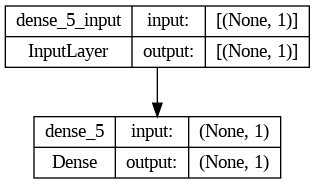

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

###Visualizing model prediction

plot them against ground truth labels.
y_test or y_pred (ground truth versus model prediction)

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 133ms/step


array([[42.89818 ],
       [45.669975],
       [48.441772],
       [51.213566],
       [53.98536 ],
       [56.757156],
       [59.528954],
       [62.300747],
       [65.07254 ],
       [67.84434 ]], dtype=float32)

In [ ]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="training data")
  plt.scatter(test_data, test_labels, c="g", label="testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

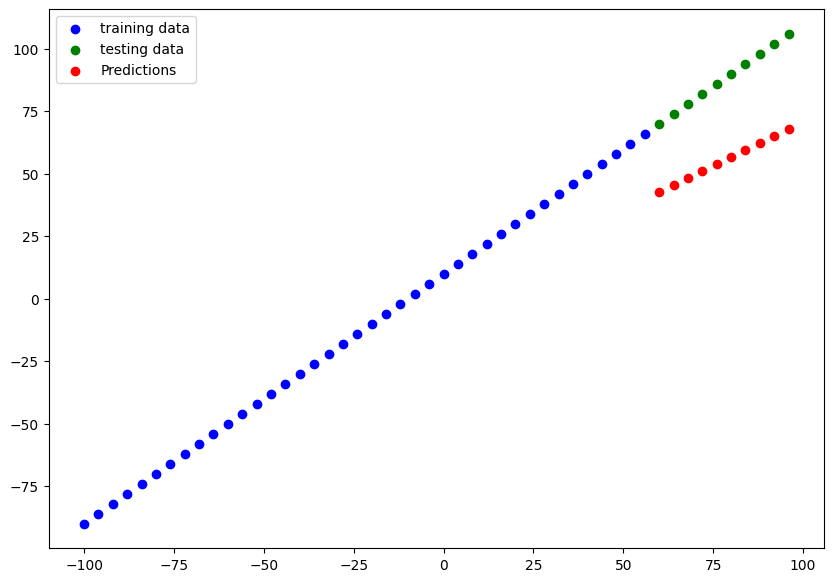

In [ ]:
plot_predictions()

###Evaluating model's prediction with regression evaluation metrics

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 358ms/step - loss: 32.6287 - mae: 32.6287


[32.62874221801758, 32.62874221801758]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([45.10182 , 42.330025, 39.558228, 36.786434, 34.01464 , 31.242844,
       28.471045, 25.699253, 22.92746 , 20.155663], dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=32.628742>

In [ ]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1077.0798>

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))


###Running experiments to improve our model

1. get more data - more examples for model to train on
2. Make larger model - more layers or hidden units
3. train for longer - model more of chance to find patterns in data

1. epochs 100
2. 2 layers 100 epochs
3. 2layers, 500 epochs

In [ ]:
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 24ms/step - loss: 82.9807 - mae: 82.9807
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 47.5731 - mae: 47.5731
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 13.6204 - mae: 13.6204
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 7.7623 - mae: 7.7623
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 11.3258 - mae: 11.3258
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 10.4526 - mae: 10.4526
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4280 - mae: 9.4280
Epoch 8/100
2/2 [==============================] - 0s 18ms/step - loss: 9.2943 - mae: 9.2943
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 12.0061 - mae: 12.0061
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 13.9764 - mae: 13.9764
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 349ms/step


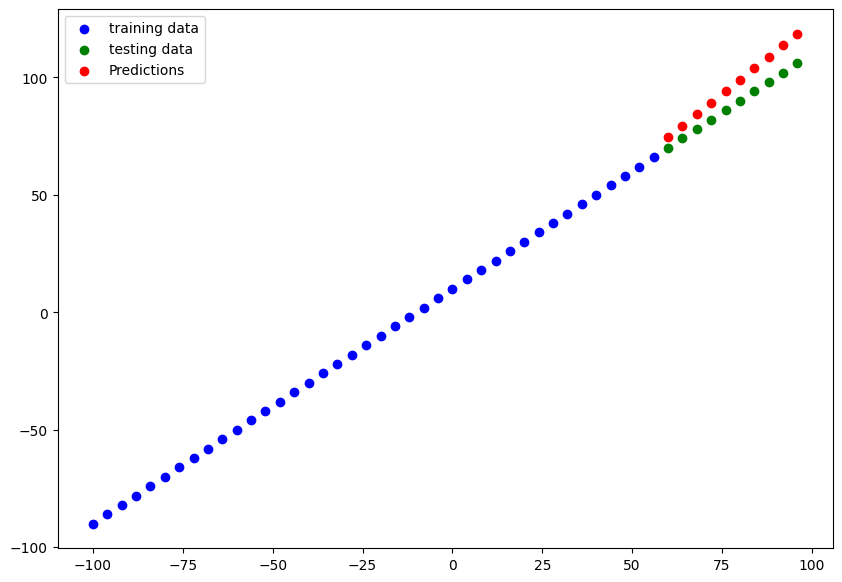

In [ ]:

# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.562996>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.813576>)

In [ ]:
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 49.3086 - mse: 3752.6582
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 27.5998 - mse: 985.2812
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 32.4658 - mse: 1589.5812
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 28.7243 - mse: 1222.0366
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 15.5741 - mse: 314.5038
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.3478 - mse: 193.4357
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6191 - mse: 165.3035
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0160 - mse: 195.7731
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 37.4856 - mse: 2162.1108
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 25.1553 - mse: 887.5018
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 163ms/step


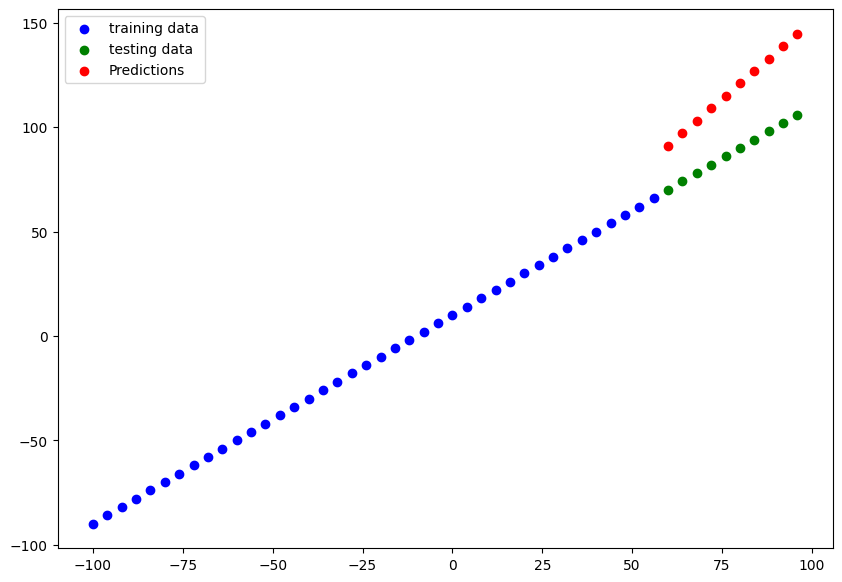

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.968933>,
 <tf.Tensor: shape=(), dtype=float32, numpy=929.65674>)

In [ ]:
tf.random.set_seed(42)

# Replicate original model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 22ms/step - loss: 42.0691 - mse: 2522.4519
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 32.3163 - mse: 1468.1488
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 29.0151 - mse: 1251.0819
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 15.8198 - mse: 375.0270
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 21.8484 - mse: 695.5791
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2977 - mse: 142.7412
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 12.3606 - mse: 197.6409
Epoch 8/500
2/2 [==============================] - 0s 18ms/step - loss: 11.0131 - mse: 141.6314
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 39.0205 - mse: 2369.3540
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 26.6005 - mse: 994.5956
Epoch 11/500
2/2 [========================

1/1 [==============================] - 0s 328ms/step


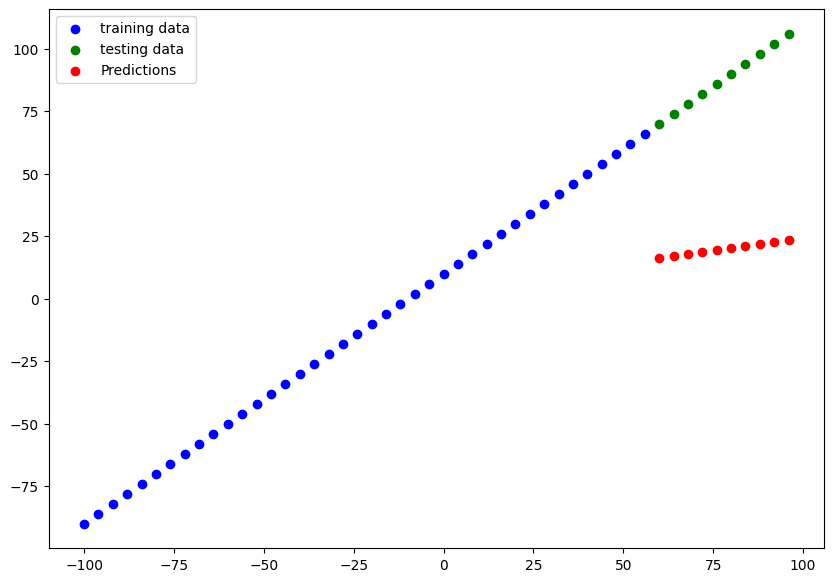

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.017685>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4710.8896>)

###Comparing the results of experiments

In [ ]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.562996,79.813576
1,model_2,29.968933,929.656738
2,model_3,68.017685,4710.889648


In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Tracking your experiments

* tensorboards
* weights and biases

###Saving our models

1. SavedModel format
2. HDF5 format

In [ ]:
model_2.save("best_model_SaveModel_format")

In [ ]:
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SaveModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 84ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 53ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

###Download a model or file from Colab

1. right click on file and download
2. code
3. save it to google drive

In [ ]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#mounting google drive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

 1602381469_cracking-the-coding-interview.pdf
 1685516347_1055_506022.pdf
 2059173_prototype3.html
 311872261_412970577695481_2010419917068978241_n.pdf
'Accessibility Testing.gform'
'Activity Template: Product Backlog.gsheet'
'Activity Template: Sprint Backlog (1).gsheet'
'Activity Template: Sprint Backlog.gsheet'
'Adobe Illustrator CC 2019 v23.0.5.619 (x64) Multilingual Pre-Cracked - [FileCR].zip'
'AI chatbot.gslides'
 arduino-1.8.16-windows.exe
 assignment.png
 best_model_HDF5_format.h5
 blog.zip
'Cambridge IntAS and A Level Physics 2nd ed.pdf'
 Classroom
 cms.zip
'Colab Notebooks'
'Copy of Medical Theme for Career Day by Slidesgo.gslides'
'Copy of Robotics Technology Business Plan by Slidesgo.gslides'
'Copy of Software Development Business Plan by Slidesgo.gslides'
'CryptoKet Web3 Marketplace Web Application By Adrian(JsMasteryPro)-20230224T175812Z-001.zip'
'CryptoKet Web3 Marketplace Web Application By Adrian(JsMasteryPro)-20230224T175812Z-002.zip'
'department of homeland security3

###larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8660.9102 - mae: 8660.9102
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7877.1841 - mae: 7877.1841
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7571.5869 - mae: 7571.5869
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7725.5674 - mae: 7725.5674
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7829.3853 - mae: 7829.3853
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7606.1670 - mae: 7606.1670
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7671.6367 - mae: 7671.6367
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7752.4614 - mae: 7752.4614
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7502.2007 - mae: 7502.2007
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 7712.1636 - mae: 7712.1636

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 6921.3945 - mae: 6921.3945


[6921.39453125, 6921.39453125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

###Improve  the model

1. add extra layers
2. train longer

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    #tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13346.0186 - mae: 13346.0186
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13332.3643 - mae: 13332.3643
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13317.1348 - mae: 13317.1348
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13299.6582 - mae: 13299.6582
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13279.6387 - mae: 13279.6387
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13256.6904 - mae: 13256.6904
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13230.7568 - mae: 13230.7568
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13201.5586 - mae: 13201.5586
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13168.8145 - mae: 13168.8145
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13132.44

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7516.1460 - mae: 7516.1460


[7516.14599609375, 7516.14599609375]

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    #tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13325.3320 - mae: 13325.3320
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13313.4473 - mae: 13313.4473
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13300.2656 - mae: 13300.2656
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13284.8232 - mae: 13284.8232
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13266.2832 - mae: 13266.2832
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13243.9043 - mae: 13243.9043
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 13217.5664 - mae: 13217.5664
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 13187.2090 - mae: 13187.2090
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 13152.7842 - mae: 13152.7842
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 13114.44

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7208.9678 - mae: 7208.9678


[7208.9677734375, 7208.9677734375]

Text(0.5, 0, 'epochs')

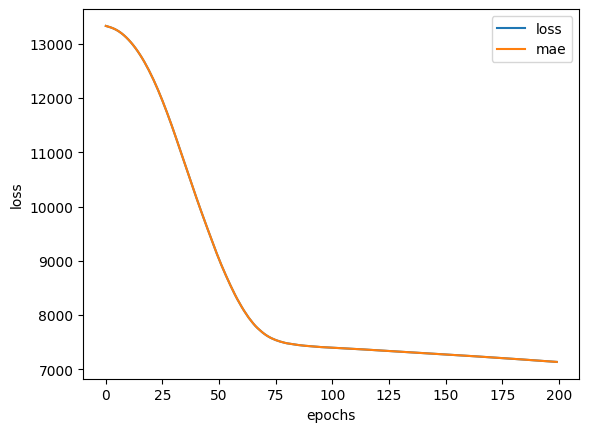

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

###Preprocessing of data(normalization and standardization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    #tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13346.5049 - mae: 13346.5049
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.8115 - mae: 13345.8115
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.0918 - mae: 13345.0918
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.2617 - mae: 13344.2617
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13343.2451 - mae: 13343.2451
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13341.9912 - mae: 13341.9912
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13340.4688 - mae: 13340.4688
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13338.6572 - mae: 13338.6572
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.5518 - mae: 13336.5518
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13334.14

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 11776.7275 - mae: 11776.7275


[11776.7275390625, 11776.7275390625]